In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Imbalanced dataset
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [3]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
#data_train.info()

In [5]:
data_train.set_index('encounter_id', inplace = True)

In [6]:
# Count the occurrences of "?" or NaN in each column
question_mark_nan_count = data_train.applymap(lambda x: x == '?' or pd.isna(x)).sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_question_mark_nan = (question_mark_nan_count / len(data_train)) * 100

# Print the result
print(percentage_question_mark_nan)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result

country                                   0.000000
patient_id                                0.000000
race                                      7.117188
gender                                    0.000000
age                                       4.993262
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis              

In [7]:
#data_train.describe(include = "all").T

# Pre Processing

In [8]:
# too many missing values
data_train = data_train.drop(columns=['weight', 'payer_code', 'medical_specialty', 'glucose_test_result', 'a1c_test_result', 'patient_id', 'admission_type'])

In [9]:
data_train = data_train.drop(columns=['country']) ## only 1 country

In [10]:
data_train.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,discharge_disposition,admission_source,length_of_stay_in_hospital,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,127,Discharged to home,Emergency Room,2,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,128,Discharged/transferred to a federal health car...,Clinic Referral,14,...,25,38,785,162,9,No,Yes,['insulin'],No,No
634063,Caucasian,Female,[60-70),0,0,1,94,Discharged to home,NaN,6,...,22,534,135,250,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,81,Discharged to home,Transfer from another health care facility,6,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,126,Discharged/transferred to home with home healt...,Physician Referral,6,...,15,715,599,428,9,No,No,[],No,>30 days


In [11]:
## replace all '?' with Nan
data_train.replace('?', np.nan, inplace=True)

In [12]:
data_train.isna().sum() / (len(data_train)) * 100

race                                     7.117188
gender                                   0.000000
age                                      4.993262
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
average_pulse_bpm                        0.000000
discharge_disposition                    3.635802
admission_source                         6.623056
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.022461
secondary_diagnosis                      0.367792
additional_diagnosis                     1.415015
number_diagnoses                         0.000000
change_in_meds_during_hospitalization    0.000000
prescribed_diabetes_meds                 0.000000
medication                               0.000000


In [13]:
## Copy df for mode imputing
data_train_mode = data_train.copy()

In [14]:
# # Fill with mode

# # Define the columns with missing values
# columns_with_missing_mode = ['race', 'age', 'discharge_disposition', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']
# # Loop through each column and impute with the most common value
# for column in columns_with_missing_mode:
#     most_common_value = data_train_mode[column].mode()[0]
#     data_train_mode[column].fillna(most_common_value, inplace=True)

In [15]:
## Dropping all rows with nan

# List of columns to check for NaN values
columns_to_check = ['admission_source', 'race', 'age',
                    'discharge_disposition', 'primary_diagnosis',
                    'secondary_diagnosis', 'additional_diagnosis']

# Drop rows with NaN values in any of the specified columns
data_train_mode = data_train_mode.dropna(subset=columns_to_check)

In [16]:
data_train_mode.isna().sum() / (len(data_train_mode)) * 100

race                                     0.0
gender                                   0.0
age                                      0.0
outpatient_visits_in_previous_year       0.0
emergency_visits_in_previous_year        0.0
inpatient_visits_in_previous_year        0.0
average_pulse_bpm                        0.0
discharge_disposition                    0.0
admission_source                         0.0
length_of_stay_in_hospital               0.0
number_lab_tests                         0.0
non_lab_procedures                       0.0
number_of_medications                    0.0
primary_diagnosis                        0.0
secondary_diagnosis                      0.0
additional_diagnosis                     0.0
number_diagnoses                         0.0
change_in_meds_during_hospitalization    0.0
prescribed_diabetes_meds                 0.0
medication                               0.0
readmitted_binary                        0.0
readmitted_multiclass                    0.0
dtype: flo

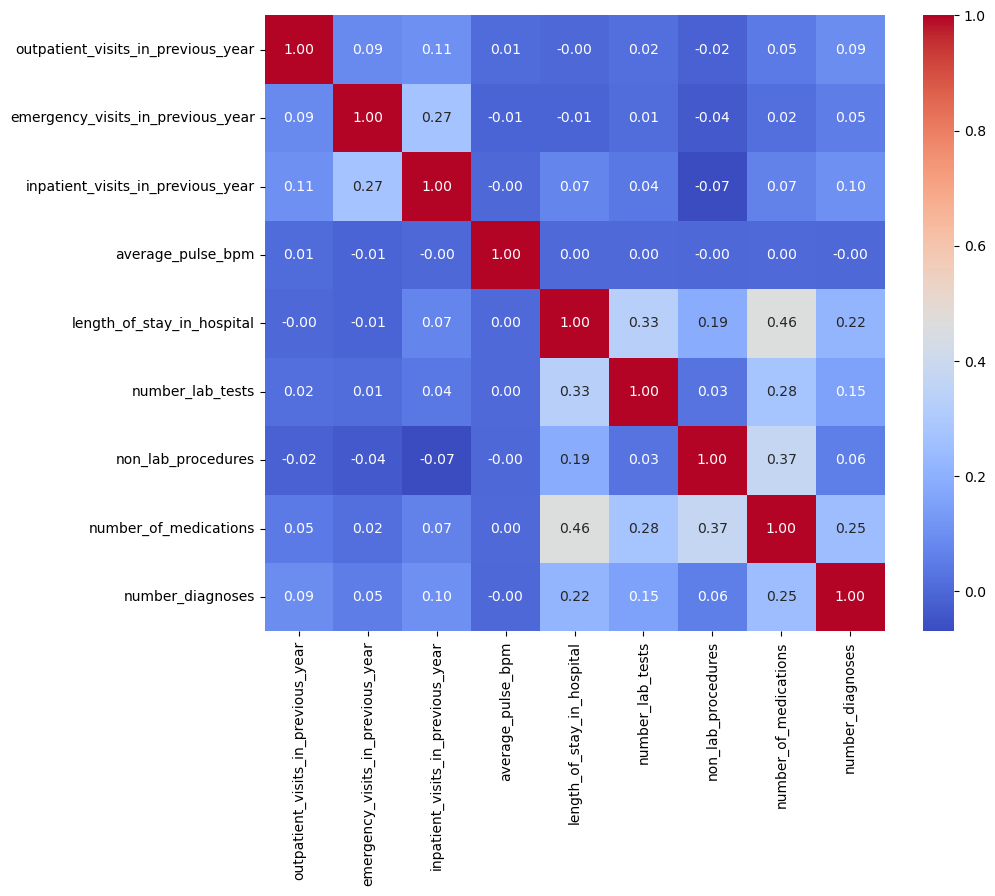

In [17]:
# Select only the numerical columns
numerical_df = data_train_mode.select_dtypes(include=['number'])

# Normalize columns
scaler = MinMaxScaler()
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Calculate the correlation matrix
correlation_matrix = normalized_numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()

In [18]:
## no correlation 'average_pulse_bpm'
data_train_corr = data_train_mode.drop(columns=['average_pulse_bpm'])

In [19]:
data_train_corr.head(10)

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,Discharged to home,Emergency Room,2,48,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,Discharged/transferred to a federal health car...,Clinic Referral,14,71,...,25,38,785,162,9,No,Yes,['insulin'],No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,Discharged to home,Transfer from another health care facility,6,48,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,47,...,15,715,599,428,9,No,No,[],No,>30 days
269878,Caucasian,Female,[50-60),0,0,0,Discharged to home,Emergency Room,3,58,...,10,574,250,244,3,No,No,[],No,>30 days
182051,Caucasian,Female,[50-60),0,0,0,Discharged to home,Emergency Room,1,59,...,13,786,250.02,493,9,Ch,Yes,"['metformin', 'glimepiride']",No,No
964239,Other,Male,[70-80),0,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,56,...,39,414,287,276,9,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No
418598,Caucasian,Female,[50-60),1,0,0,Discharged to home,Physician Referral,3,55,...,16,682,250.02,276,9,No,Yes,['insulin'],No,No
760130,Caucasian,Female,[70-80),0,0,0,Discharged to home,Physician Referral,8,40,...,21,425,398,745,9,No,Yes,['insulin'],No,>30 days


# Encoding

In [20]:
## Encode age seperate

# Define the mapping
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 5,
    '[40-50)': 6,
    '[50-60)': 7,
    '[60-70)': 9,
    '[70-80)': 10,
    '[80-90)': 8,
    '[90-100)': 4
}

# Apply the mapping to the 'age' column
data_train_corr['age'] = data_train_corr['age'].map(age_mapping)

In [21]:
## Encode gender seperate

# manually dropt 3 rows where gender is nan
data_train_corr = data_train_corr.dropna(subset=['gender'])

# Drop rows where 'gender' is equal to 'Unknown/Invalid'
data_train_corr = data_train_corr[data_train_corr['gender'] != 'Unknown/Invalid']

data_train_corr['gender'] = data_train_corr['gender'].map({'Male': 1, 'Female': 0})






In [22]:
## Encode diagnosis columns according to chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cdc.gov/nchs/data/icd/icd9cm_guidelines_2011.pdf ----> chapter 3.....

def encode_diagnosis(x):
    if pd.isna(x):
        return 0
    elif x < 0:
        return 17
    elif 1 <= x < 140:
        return 0
    elif 140 <= x < 240:
        return 1
    elif 240 <= x < 280:
        return 2
    elif 280 <= x < 290:
        return 3
    elif 290 <= x < 320:
        return 4
    elif 320 <= x < 390:
        return 5
    elif 390 <= x < 460:
        return 6
    elif 460 <= x < 520:
        return 7
    elif 520 <= x < 580:
        return 8
    elif 580 <= x < 630:
        return 9
    elif 630 <= x < 680:
        return 10
    elif 680 <= x < 710:
        return 11
    elif 710 <= x < 740:
        return 12
    elif 740 <= x < 760:
        return 13
    elif 760 <= x < 780:
        return 14
    elif 780 <= x < 800:
        return 15
    elif 800 <= x < 1000:
        return 16
    else:
        return x

# Encode 'primary_diagnosis' column
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].astype(str)
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].str.replace('?', '0')
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].str.replace('V', '-')
data_train_corr['primary_diagnosis'] = pd.to_numeric(data_train_corr['primary_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].apply(encode_diagnosis)

# Encode 'secondary_diagnosis' column
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].astype(str)
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].str.replace('?', '0')
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].str.replace('V', '-')
data_train_corr['secondary_diagnosis'] = pd.to_numeric(data_train_corr['secondary_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].apply(encode_diagnosis)

# Encode 'additional_diagnosis' column
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].astype(str)
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].str.replace('?', '0')
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].str.replace('V', '-')
data_train_corr['additional_diagnosis'] = pd.to_numeric(data_train_corr['additional_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].apply(encode_diagnosis)


In [23]:
## drop additional diagnosis

# data_train_corr = data_train_corr.drop(columns=['additional_diagnosis'])

In [24]:
# ## LabelEncoding

# # Create a label encoder
# label_encoder = LabelEncoder()

# # Define the columns you want to encode
# columns_to_encode = ['discharge_disposition', 'race', 'admission_source']

# # Loop through each column and apply label encoding
# for column in columns_to_encode:
#     data_train_corr[column] = label_encoder.fit_transform(data_train_corr[column])

In [25]:
data_train_corr.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0,10,0,0,2,Discharged to home,Emergency Room,2,48,...,20,7,2,7,8,No,No,[],No,>30 days
426224,AfricanAmerican,1,7,0,0,0,Discharged/transferred to a federal health car...,Clinic Referral,14,71,...,25,0,15,1,9,No,Yes,['insulin'],No,No
890610,AfricanAmerican,1,9,0,0,1,Discharged to home,Transfer from another health care facility,6,48,...,9,8,8,6,5,No,No,[],No,No
654194,Caucasian,0,10,1,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,47,...,15,12,9,6,9,No,No,[],No,>30 days
269878,Caucasian,0,7,0,0,0,Discharged to home,Emergency Room,3,58,...,10,8,2,2,3,No,No,[],No,>30 days


In [26]:
## Use One Hot Encoder technique

data_train_hot_encoded = pd.get_dummies(data_train_corr, columns=['discharge_disposition'], prefix='race').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['race'], prefix='admission_type').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})

In [27]:
# data_train_hot_encoded = data_train_corr.copy()

In [28]:
data_train_hot_encoded['gender'].value_counts()

gender
0    29960
1    25496
Name: count, dtype: int64

In [29]:
## Encode seperately the following columns

data_train_hot_encoded['change_in_meds_during_hospitalization'] = data_train_hot_encoded['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})
data_train_hot_encoded['prescribed_diabetes_meds'] = data_train_hot_encoded['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

In [30]:
data_train_hot_encoded.dtypes

gender                                                                         int64
age                                                                            int64
outpatient_visits_in_previous_year                                             int64
emergency_visits_in_previous_year                                              int64
inpatient_visits_in_previous_year                                              int64
                                                                               ...  
admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim    int64
admission_source_Clinic Referral                                               int64
admission_source_HMO Referral                                                  int64
admission_source_Normal Delivery                                               int64
admission_source_Transfer from a hospital                                      int64
Length: 61, dtype: object

In [31]:
# ## column medication

# # Remove rows with NaN values in the 'medication' column
# data_train_hot_encoded = data_train_hot_encoded.dropna(subset=['medication'])

# # Extract unique medications from the 'medication' column
# unique_medications = set()

# # Iterate through each row in the 'medication' column and add the medications to the set
# for medication_list in data_train_hot_encoded['medication']:
#     medications = medication_list.strip('[]').replace(" ", "").split(',')
#     unique_medications.update(medications)

# # Convert the set to a list to count the unique medications
# unique_medications_list = list(unique_medications)

# # Create binary columns for each unique medication and set values to 1 if present, 0 if not
# for medication in unique_medications_list:
#     data_train_hot_encoded[medication] = data_train_hot_encoded['medication'].apply(lambda x: 1 if medication in x else 0)

# # Drop the original 'medication' column
# data_train_hot_encoded = data_train_hot_encoded.drop(columns=['medication'])

In [32]:
## medication

# 1 if record has medication insulin in it else 0 
data_train_hot_encoded['has_insulin'] = data_train_hot_encoded['medication'].apply(lambda x: 1 if 'insulin' in x else 0)

# 1 if record has any medication else 0 

# Assuming data_train is your DataFrame
data_train_hot_encoded['medication'] = data_train_hot_encoded['medication'].apply(lambda x: 1 if x and x != '[]' else 0)



In [33]:
## readmitted binary 

## Binary target: Yes if patient was readmitted in <30 days, No otherwise

# data_train['readmitted_binary'] = data_train['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary'] = data_train_hot_encoded['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary']

encounter_id
533253    0
426224    0
890610    0
654194    0
269878    0
         ..
288699    0
758007    0
660160    0
757560    0
459757    0
Name: readmitted_binary, Length: 55456, dtype: int64

# Models

In [34]:
data_train_models = data_train_hot_encoded.copy()
data_train_models = data_train_models.dropna(subset=['gender'])

In [35]:
# Extract features and target variable
X = data_train_models.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_models['readmitted_binary']

In [36]:
# Identify binary columns (assuming binary columns have values 0 or 1)
binary_columns = [col for col in X.columns if set(X[col]) == {0, 1}]

# Separate non-binary columns
non_binary_columns = [col for col in X.columns if col not in binary_columns]

# Create a copy of the DataFrame to preserve the original data
X_scaled = X.copy()

# Initialize the MinMaxScaler to normalize between 0 and 1
scaler = MinMaxScaler()

# Apply scaling to non-binary columns
X_scaled[non_binary_columns] = scaler.fit_transform(X[non_binary_columns])

# The X_scaled DataFrame now contains normalized non-binary features between 0 and 1, while binary columns remain unchanged
# Converted every column into float
X_scaled = X_scaled.astype(float)
X_scaled.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,...,admission_source_ Transfer from Ambulatory Surgery Center,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,has_insulin
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,1.000000,0.00000,0.0,0.095238,0.076923,0.391667,0.000000,0.256757,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426224,1.0,0.666667,0.00000,0.0,0.000000,1.000000,0.583333,0.000000,0.324324,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
890610,1.0,0.888889,0.00000,0.0,0.047619,0.384615,0.391667,0.333333,0.108108,0.470588,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654194,0.0,1.000000,0.02381,0.0,0.000000,0.384615,0.383333,0.166667,0.189189,0.705882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269878,0.0,0.666667,0.00000,0.0,0.000000,0.153846,0.475000,0.333333,0.121622,0.470588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
## Splitting and oversampling

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 39371, 1: 39371}


In [38]:
X.isna().sum()

gender                                                                                                            0
age                                                                                                               0
outpatient_visits_in_previous_year                                                                                0
emergency_visits_in_previous_year                                                                                 0
inpatient_visits_in_previous_year                                                                                 0
length_of_stay_in_hospital                                                                                        0
number_lab_tests                                                                                                  0
non_lab_procedures                                                                                                0
number_of_medications                                                   

In [39]:
## create a model

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.04499274310595065


In [40]:
X.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,...,admission_source_ Transfer from Ambulatory Surgery Center,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,has_insulin
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0,10,0,0,2,2,48,0,20,7,...,0,0,0,0,0,0,0,0,0,0
426224,1,7,0,0,0,14,71,0,25,0,...,0,0,0,0,0,1,0,0,0,1
890610,1,9,0,0,1,6,48,2,9,8,...,0,0,1,0,0,0,0,0,0,0
654194,0,10,1,0,0,6,47,1,15,12,...,0,0,0,0,0,0,0,0,0,0
269878,0,7,0,0,0,3,58,2,10,8,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Create a neural network model
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_nn = model_nn.predict(X_test)

# Calculate the F1 score for the neural network model
f1_nn = f1_score(y_test, y_pred_nn)

print(f'Neural Network F1 Score: {f1_nn}')


Neural Network F1 Score: 0.2502726281352236


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Create a logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate the F1 score for the logistic regression model
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression F1 Score: {f1_lr}')


Logistic Regression F1 Score: 0.28173696239351753


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Create a k-nearest neighbors (KNN) model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Calculate the F1 score for the KNN model
f1_knn = f1_score(y_test, y_pred_knn)

print(f'KNN F1 Score: {f1_knn}')


KNN F1 Score: 0.2182902584493042
